https://www.kaggle.com/datasets/thedevastator/discovering-hidden-trends-in-global-video-games

Discovering Hidden Trends in Global Video Games

## Mengunduh Data

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ronimerdiansah","key":"348f3c0ae2b3fdaae4760582c857b6e3"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [5]:
!kaggle datasets download -d thedevastator/discovering-hidden-trends-in-global-video-games

  0% 0.00/55.9k [00:00<?, ?B/s]
100% 55.9k/55.9k [00:00<00:00, 30.4MB/s]


In [6]:
!mkdir discovering-hidden-trends-in-global-video-games
!unzip discovering-hidden-trends-in-global-video-games.zip -d discovering-hidden-trends-in-global-video-games
!ls discovering-hidden-trends-in-global-video-games

Archive:  discovering-hidden-trends-in-global-video-games.zip
  inflating: discovering-hidden-trends-in-global-video-games/Video Games Sales.csv  
'Video Games Sales.csv'


## Mepersiapkan Data

In [7]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
from functools import reduce
pd.set_option('display.max_columns', None)

In [322]:
dataset = pd.read_csv('/content/discovering-hidden-trends-in-global-video-games/Video Games Sales.csv')

In [323]:
dataset

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1902,1903,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00
1903,1903,1904,Xenoblade Chronicles,Wii,2010.0,Role-Playing,Nintendo,0.39,0.22,0.16,0.07,0.83,91.74
1904,1904,1905,SingStar Abba,PS3,2008.0,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00
1905,1905,1906,FIFA Soccer World Championship,PS2,2000.0,Sports,Electronic Arts,0.27,0.21,0.28,0.07,0.83,73.00


In [324]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1907 non-null   int64  
 1   Rank           1907 non-null   int64  
 2   Game Title     1907 non-null   object 
 3   Platform       1907 non-null   object 
 4   Year           1878 non-null   float64
 5   Genre          1907 non-null   object 
 6   Publisher      1905 non-null   object 
 7   North America  1907 non-null   float64
 8   Europe         1907 non-null   float64
 9   Japan          1907 non-null   float64
 10  Rest of World  1907 non-null   float64
 11  Global         1907 non-null   float64
 12  Review         1907 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 193.8+ KB


## Membersihkan Data

### Memilih FItur

In [325]:
dataset.rename(columns = {'index':'User_ID', 'Game Title':'Game_Title'}, inplace = True)
selected_df = dataset[['User_ID', 'Game_Title',	'Platform',	'Year',	'Genre',	'Publisher', 'Review']]

clean_df = selected_df.dropna()

In [326]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1878 entries, 0 to 1906
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     1878 non-null   int64  
 1   Game_Title  1878 non-null   object 
 2   Platform    1878 non-null   object 
 3   Year        1878 non-null   float64
 4   Genre       1878 non-null   object 
 5   Publisher   1878 non-null   object 
 6   Review      1878 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 117.4+ KB


In [327]:
clean_df.head()

,User_ID,Game_Title,Platform,Year,Genre,Publisher,Review
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,76.28
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,91.00
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,82.07
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,82.65
4,4,Tetris,GB,1989.0,Puzzle,Nintendo,88.00


### Format Ulang Fitur

In [328]:
print('Jumlah User ID: ', len(clean_df.User_ID.unique()))
print('Jumlah Nama Game: ', len(clean_df.Game_Title.unique()))
print('Jumlah Genre: ', len(clean_df.Genre.unique()))

Jumlah User ID:  1878
Jumlah Nama Game:  1505
Jumlah Genre:  12


In [329]:
clean_df['Review'] = round(clean_df['Review'])
clean_df

<ipython-input-329-bb2901dfaf58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Review'] = round(clean_df['Review'])


,User_ID,Game_Title,Platform,Year,Genre,Publisher,Review
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,76.0
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,91.0
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,82.0
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,83.0
4,4,Tetris,GB,1989.0,Puzzle,Nintendo,88.0
...,...,...,...,...,...,...,...
1902,1902,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,55.0
1903,1903,Xenoblade Chronicles,Wii,2010.0,Role-Playing,Nintendo,92.0
1904,1904,SingStar Abba,PS3,2008.0,Misc,Sony Computer Entertainment,73.0
1905,1905,FIFA Soccer World Championship,PS2,2000.0,Sports,Electronic Arts,73.0


In [330]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1878 entries, 0 to 1906
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     1878 non-null   int64  
 1   Game_Title  1878 non-null   object 
 2   Platform    1878 non-null   object 
 3   Year        1878 non-null   float64
 4   Genre       1878 non-null   object 
 5   Publisher   1878 non-null   object 
 6   Review      1878 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 117.4+ KB


### Membuat Game ID Produk

In [331]:
LE = LabelEncoder()

clean_df['Game_ID'] = LE.fit_transform(clean_df['Game_Title'])

<ipython-input-331-f93033125f90>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Game_ID'] = LE.fit_transform(clean_df['Game_Title'])


In [332]:
clean_df

,User_ID,Game_Title,Platform,Year,Genre,Publisher,Review,Game_ID
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,76.0,1444
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,91.0,1182
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,82.0,623
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,83.0,1445
4,4,Tetris,GB,1989.0,Puzzle,Nintendo,88.0,1243
...,...,...,...,...,...,...,...,...
1902,1902,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,55.0,567
1903,1903,Xenoblade Chronicles,Wii,2010.0,Role-Playing,Nintendo,92.0,1471
1904,1904,SingStar Abba,PS3,2008.0,Misc,Sony Computer Entertainment,73.0,1056
1905,1905,FIFA Soccer World Championship,PS2,2000.0,Sports,Electronic Arts,73.0,308


In [333]:
for col in clean_df:
    print(f"\033[1m{col} \n{20 * '-'}\033[0m")
    print(clean_df[col].value_counts(), '\n')

User_ID 
--------------------
0       1
1262    1
1274    1
1273    1
1272    1
       ..
630     1
629     1
628     1
627     1
1906    1
Name: User_ID, Length: 1878, dtype: int64 

Game_Title 
--------------------
FIFA Soccer 08                                 6
WWE SmackDown vs Raw 2008                      5
The Simpsons Game                              5
Pro Evolution Soccer 2008                      5
LEGO Indiana Jones: The Original Adventures    5
                                              ..
Star Wars: Dark Forces                         1
The 7th Guest                                  1
Crash Nitro Kart                               1
Scribblenauts                                  1
FIFA Soccer World Championship                 1
Name: Game_Title, Length: 1505, dtype: int64 

Platform 
--------------------
PS2     363
PS      221
X360    218
PS3     200
Wii     156
DS      149
GBA      73
XB       70
PC       69
PSP      61
NES      60
N64      57
GC       55
GB       4

### Menghapus Data Duplikasi

In [334]:
clean_df = clean_df.drop_duplicates('Game_ID')
clean_df = clean_df.reset_index(drop=True)
clean_df

,User_ID,Game_Title,Platform,Year,Genre,Publisher,Review,Game_ID
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,76.0,1444
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,91.0,1182
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,82.0,623
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,83.0,1445
4,4,Tetris,GB,1989.0,Puzzle,Nintendo,88.0,1243
...,...,...,...,...,...,...,...,...
1500,1898,Dynasty Warriors 2,PS2,2000.0,Action,THQ,72.0,264
1501,1900,Army of Two: The 40th Day,X360,2010.0,Shooter,Electronic Arts,72.0,40
1502,1902,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,55.0,567
1503,1903,Xenoblade Chronicles,Wii,2010.0,Role-Playing,Nintendo,92.0,1471


## Model Development dengan Content Based Filtering

In [335]:
game_id = clean_df['Game_ID'].tolist()
 
genre = clean_df['Genre'].tolist()
 
title = clean_df['Game_Title'].tolist()
 
print(len(game_id))
print(len(genre))
print(len(title))

1505
1505
1505


In [336]:
product_new = pd.DataFrame({
    'game_id': game_id,
    'genre': genre,
    'title': title
})
product_new

,game_id,genre,title
0,1444,Sports,Wii Sports
1,1182,Platform,Super Mario Bros.
2,623,Racing,Mario Kart Wii
3,1445,Sports,Wii Sports Resort
4,1243,Puzzle,Tetris
...,...,...,...
1500,264,Action,Dynasty Warriors 2
1501,40,Shooter,Army of Two: The 40th Day
1502,567,Action,Lizzie McGuire 2: Lizzie Diaries
1503,1471,Role-Playing,Xenoblade Chronicles


In [337]:
first_df = product_new
first_df.sample(5)

,game_id,genre,title
808,190,Shooter,Die Hard Trilogy
927,556,Action,LEGO Star Wars III: The Clone Wars
1070,1044,Misc,Shrek / Shrek 2 2-in-1 Gameboy Advance Video
1098,1174,Platform,Super Ghouls 'n Ghosts
778,740,Racing,NASCAR 2000


### TF-IDF Vectorizer

In [338]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
tf.fit(first_df['genre']) 
tf.get_feature_names() 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['action',
 'adventure',
 'fighting',
 'misc',
 'platform',
 'playing',
 'puzzle',
 'racing',
 'role',
 'shooter',
 'simulation',
 'sports',
 'strategy']

In [339]:
tfidf_matrix = tf.fit_transform(first_df['genre']) 
 
tfidf_matrix.shape 

(1505, 13)

In [340]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]])

In [341]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=first_df['title']
).sample(10, axis=1).sample(10, axis=0)

,platform,action,role,misc,adventure,sports,racing,fighting,playing,simulation
title,,,,,,,,,,
Crysis 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NFL Street,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Guitar Hero 5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Donkey Kong,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ghosts 'n Goblins,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kessen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sonic Adventure 2 Battle,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
World Class Track Meet,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Yu-Gi-Oh! Duel Monsters II: Dark Duel Stories,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Cosine Similarity

In [342]:
from sklearn.metrics.pairwise import cosine_similarity
 
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [343]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=first_df['title'], columns=first_df['title'])
print('Shape:', cosine_sim_df.shape)
 
cosine_sim_df.sample(10, axis=1).sample(10, axis=0)

Shape: (1505, 1505)


title,Jeremy McGrath Supercross 98,EA Sports Active 2,MySims,The Legend of Zelda: Majora's Mask,Toy Story 2: Buzz Lightyear to the Rescue!,Tenchu: Wrath of Heaven,Hot Wheels Turbo Racing,Dragon Quest IX: Sentinels of the Starry Skies,Sonic the Hedgehog,Tetris 2 (All region sales)
title,,,,,,,,,,
Star Fox: Assault,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sonic Mega Collection Plus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Turok: Evolution,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Orange Box,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Test Drive 5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
NFL Street,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Winning Eleven: Pro Evolution Soccer 2007 (All Region sales),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mario Tennis,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
True Crime: Streets of LA,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Mendapatkan Rekomendasi

In [344]:
def resto_recommendations(nama_resto, similarity_data=cosine_sim_df, items=first_df[['title', 'genre']], k=5):
    index = similarity_data.loc[:,nama_resto].to_numpy().argpartition(
        range(-1, -k, -1))
    
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    closest = closest.drop(nama_resto, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [345]:
first_df[first_df.title.eq('Grand Theft Auto: San Andreas')]

,game_id,genre,title
14,404,Action,Grand Theft Auto: San Andreas


In [346]:
resto_recommendations('Grand Theft Auto: San Andreas')

,title,genre
0,New Super Mario Bros. U,Action
1,Final Fight 2,Action
2,The Lost World: Jurassic Park,Action
3,Frogger 2: Swampy's Revenge,Action
4,Dynasty Warriors 4,Action


## Model Development dengan Collaborative Filtering

In [347]:
user_id = clean_df['User_ID'].tolist()
 
game_id = clean_df['Game_ID'].tolist()

title = clean_df['Game_Title'].tolist()

platform = clean_df['Platform'].tolist()

year = clean_df['Year'].tolist()

genre = clean_df['Genre'].tolist()

publisher = clean_df['Publisher'].tolist()

rating = clean_df['Review'].tolist()

print(len(user_id))
print(len(game_id))
print(len(rating))

1505
1505
1505


In [348]:
rating_new = pd.DataFrame({
    'user_id': user_id,
    'game_id' : game_id,
    'title' : title,
    'platform' : platform,
    'year' : year,
    'genre' : genre,
    'publisher' : publisher,
    'rating': rating
})
rating_new

,user_id,game_id,title,platform,year,genre,publisher,rating
0,0,1444,Wii Sports,Wii,2006.0,Sports,Nintendo,76.0
1,1,1182,Super Mario Bros.,NES,1985.0,Platform,Nintendo,91.0
2,2,623,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,82.0
3,3,1445,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,83.0
4,4,1243,Tetris,GB,1989.0,Puzzle,Nintendo,88.0
...,...,...,...,...,...,...,...,...
1500,1898,264,Dynasty Warriors 2,PS2,2000.0,Action,THQ,72.0
1501,1900,40,Army of Two: The 40th Day,X360,2010.0,Shooter,Electronic Arts,72.0
1502,1902,567,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,55.0
1503,1903,1471,Xenoblade Chronicles,Wii,2010.0,Role-Playing,Nintendo,92.0


In [349]:
second_df = rating_new
second_df.sample(5)

,user_id,game_id,title,platform,year,genre,publisher,rating
58,63,1175,Super Mario 3D Land,3DS,2011.0,Platform,Nintendo,88.0
341,376,1456,World Soccer Winning Eleven 6 International,PS2,2002.0,Sports,Konami Digital Entertainment,91.0
895,1048,1199,Super Metroid,SNES,1994.0,Adventure,Nintendo,94.0
1162,1418,1467,Worldwide Soccer Manager 2008,PC,2007.0,Sports,Russel,82.0
1361,1703,698,Midnight Club: LA Remix,PSP,2008.0,Racing,Take-Two Interactive,79.0


### Mempersiapkan Data

In [350]:
user_ids = second_df['user_id'].unique().tolist()
print('list user_id: ', user_ids)
 
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user_id : ', user_to_user_encoded)
 
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke user_id: ', user_encoded_to_user)

list user_id:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 152, 154, 155, 156, 157, 158, 160, 161, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 187, 190, 191, 192, 194, 196, 197, 198, 199, 201, 202, 203, 205, 206, 207, 208, 209, 210, 211, 212, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240,

In [351]:
game_ids = second_df['game_id'].unique().tolist()
 
game_to_game_encoded = {x: i for i, x in enumerate(game_ids)}
 
game_encoded_to_game = {i: x for i, x in enumerate(game_ids)}

In [352]:
second_df['user'] = second_df['user_id'].map(user_to_user_encoded)

second_df['game'] = second_df['game_id'].map(game_to_game_encoded)

In [353]:
num_users = len(user_to_user_encoded)
print(num_users)
 
num_game = len(game_to_game_encoded)
print(num_game)
 
min_rating = min(second_df['rating'])
 
max_rating = max(second_df['rating'])
 
print('Number of User: {}, Number of Game: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_game, min_rating, max_rating
))

1505
1505
Number of User: 1505, Number of Game: 1505, Min Rating: 30.0, Max Rating: 97.0


### Membagi Data untuk Training dan Validasi

In [354]:
second_df = second_df.sample(frac=1, random_state=42)
second_df

,user_id,game_id,title,platform,year,genre,publisher,rating,user,game
51,56,391,Gran Turismo 2,PS,1999.0,Racing,Sony Computer Entertainment,92.0,51,51
976,1163,669,Mega Man Battle Network 3 Blue / White Version,GBA,2002.0,Role-Playing,Capcom,78.0,976,976
184,205,1100,Sonic the Hedgehog,GEN,1991.0,Platform,Sega,87.0,184,184
1001,1196,357,Forza: Horizon,X360,2012.0,Racing,Microsoft Game Studios,86.0,1001,1001
746,871,1331,Tom Clancy's Rainbow Six,PS,1999.0,Shooter,Red Storm Entertainment,48.0,746,746
...,...,...,...,...,...,...,...,...,...,...
1130,1370,48,Asteroids,PS,1998.0,Shooter,Success,65.0,1130,1130
1294,1597,364,Game & Watch Gallery,GB,1997.0,Misc,Nintendo,76.0,1294,1294
860,1006,411,Guitar Hero 5,Wii,2009.0,Misc,Activision,84.0,860,860
1459,1838,274,EA Sports Grand Slam Tennis,Wii,2009.0,Sports,Electronic Arts,79.0,1459,1459


In [355]:
x = second_df[['user','game']].values
 
y = second_df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
train_indices = int(0.8 * second_df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[  51   51]
 [ 976  976]
 [ 184  184]
 ...
 [ 860  860]
 [1459 1459]
 [1126 1126]] [0.92537313 0.71641791 0.85074627 ... 0.80597015 0.73134328 0.76119403]


### Proses Training

In [356]:
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

In [357]:
class RecommenderNet(tf.keras.Model):
 
  def __init__(self, num_users, num_game, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_game = num_game
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.game_embedding = layers.Embedding(
        num_game,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.game_bias = layers.Embedding(num_game, 1)
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0]) 
    game_vector = self.game_embedding(inputs[:, 1])
    game_bias = self.game_bias(inputs[:, 1])
 
    dot_user_game = tf.tensordot(user_vector, game_vector, 2) 
 
    x = dot_user_game + user_bias + game_bias
    
    return tf.nn.sigmoid(x)

In [358]:
model = RecommenderNet(num_users, num_game, 50)
 
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [359]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
151/151 [==============================] - 2s 6ms/step - loss: 0.6943 - root_mean_squared_error: 0.2840 - val_loss: 0.6937 - val_root_mean_squared_error: 0.2795
Epoch 2/100
151/151 [==============================] - 1s 5ms/step - loss: 0.6574 - root_mean_squared_error: 0.2496 - val_loss: 0.6935 - val_root_mean_squared_error: 0.2793
Epoch 3/100
151/151 [==============================] - 1s 4ms/step - loss: 0.6185 - root_mean_squared_error: 0.2079 - val_loss: 0.6935 - val_root_mean_squared_error: 0.2793
Epoch 4/100
151/151 [==============================] - 1s 4ms/step - loss: 0.5888 - root_mean_squared_error: 0.1716 - val_loss: 0.6936 - val_root_mean_squared_error: 0.2793
Epoch 5/100
151/151 [==============================] - 1s 4ms/step - loss: 0.5756 - root_mean_squared_error: 0.1545 - val_loss: 0.6936 - val_root_mean_squared_error: 0.2793
Epoch 6/100
151/151 [==============================] - 1s 4ms/step - loss: 0.5718 - root_mean_squared_error: 0.1499 - val_loss: 0.6936 

### Visualisasi Metrik

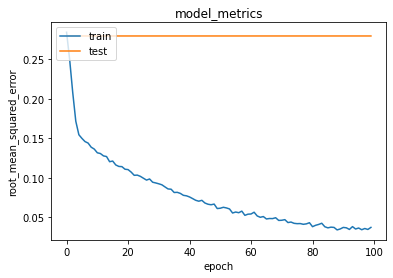

In [360]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Mendapatkan Rekomendasi Game

In [384]:
game_df = product_new
rating_df = rating_new
 
user_id = rating_df['user_id'].sample(1).iloc[0]
game_played_by_user = rating_df[rating_df['user_id'] == user_id]
 
game_not_played = game_df[~game_df['game_id'].isin(game_played_by_user['game_id'].values)]['game_id'] 
game_not_played = list(
    set(game_not_played)
    .intersection(set(game_to_game_encoded.keys()))
)
 
game_not_played = [[game_to_game_encoded.get(x)] for x in game_not_played]
user_encoder = user_to_user_encoded.get(user_id)
user_game_array = np.hstack(
    ([[user_encoder]] * len(game_not_played), game_not_played)
)

In [385]:
ratings = model.predict(user_game_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_game_ids = [
    game_encoded_to_game.get(game_not_played[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('========' * 8)
print('Game with high ratings from user')
print('--------' * 8)
 
top_game_user = (
    game_played_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .game_id.values
)
 
game_df_rows = game_df[game_df['game_id'].isin(top_game_user)]
for row in game_df_rows.itertuples():
    print(row.title, ':', row.genre)
 
print('--------' * 8)
print('Top 10 Game Recommendation')
print('--------' * 8)
 
recommended_game = game_df[game_df['game_id'].isin(recommended_game_ids)]
for row in recommended_game.itertuples():
    print(row.title, ':', row.genre)

47/47 [==============================] - 0s 2ms/step
Showing recommendations for users: 676
Game with high ratings from user
----------------------------------------------------------------
Devil May Cry 2 : Action
----------------------------------------------------------------
Top 10 Game Recommendation
----------------------------------------------------------------
Call of Duty: Modern Warfare 2 : Shooter
GoldenEye 007 : Shooter
Uncharted 2: Among Thieves : Action
Metal Gear Solid 2: Sons of Liberty : Action
God of War : Action
Metroid Prime : Shooter
BioShock : Shooter
Perfect Dark : Action
NFL 2K1 : Sports
Burnout Revenge : Racing


In [386]:
second_df.loc[second_df['user_id'] == 676]

,user_id,game_id,title,platform,year,genre,publisher,rating,user,game
589,676,178,Devil May Cry 2,PS2,2003.0,Action,Capcom,74.0,589,589
